# Blurring and Smoothing

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)
    
def load():
    img = cv2.imread('../Test_Photo/cat.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

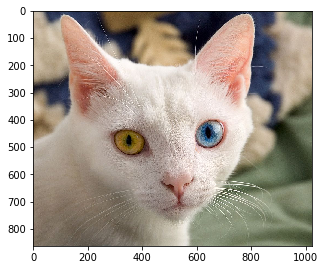

In [4]:
i = load()
display(i)

#### 我們可以透過Gamma Correction 的方式調整照片的亮度

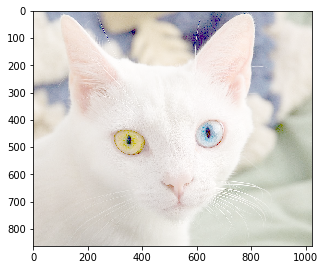

In [5]:
# 將照片調亮
img = load()
gamma = 1/4
effected_img = np.power(img,gamma)
display(effected_img)

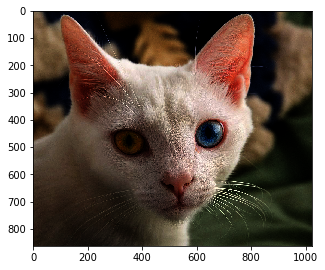

In [6]:
# 將照片調暗
img = load()
gamma = 3
effected_img = np.power(img,gamma)
display(effected_img)

#### 接下來要練習的是Low Pass Filter with a 2D Convolution¶
#### 會先定義我們想要用的Kernel並使用在我們的照片上面

In [7]:
our_kernel = np.ones(shape=(5,5),dtype=np.float32)/25
our_kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [8]:
# 將照片讀進來
img = load()
# 等等將要看差異
img[0][0]

array([0.8039216 , 0.75686276, 0.69411767], dtype=float32)

In [9]:
# 對照片複製, 這樣等等比較不會搞混
img_c = img.copy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


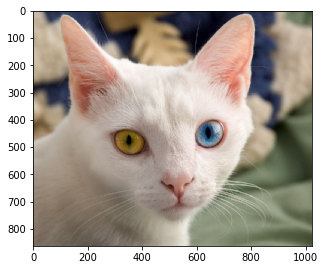

In [10]:
# 透過CV2.filter23 的功能將我們剛剛定義的kernel與我們想要模糊的照片丟進去
# 這邊需要了解的是關於 ddepth 參數.
b_img = cv2.filter2D(img_c,-1,our_kernel)
display(b_img)

#### 轉換玩的照片可以清楚看到有一些細微的訊息已經被模糊掉了, 貓也變得很乾淨了.
#### 接下來我們要介紹 不同的Bluring的方式將照片模糊掉

In [11]:
# 我們也需要定義Kernel給Bluring的function 但只需要tuple即可
img_c = img.copy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


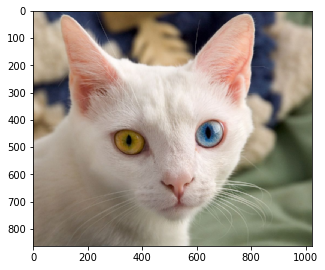

In [12]:
# Averaging Blur
blur_img = cv2.blur(img_c,(5,5))
display(blur_img)

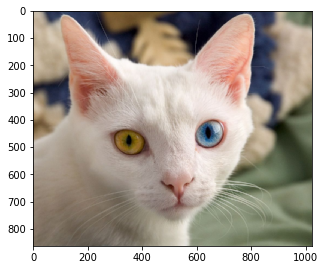

In [13]:
# Gaussian Bluring
g_blurred_img = cv2.GaussianBlur(img,(5,5),50)
display(g_blurred_img)

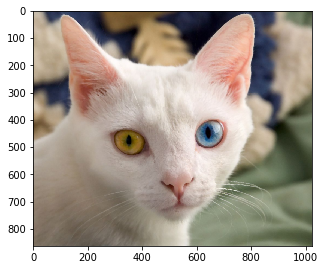

In [14]:
# median Bluring
median = cv2.medianBlur(img,5)
display(median)

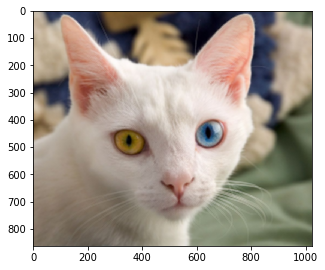

In [15]:
# Bilateral Filtering
Bi_blur_img = cv2.bilateralFilter(img,9,75,75)
display(Bi_blur_img)

#### 以上的照片可能比較難讓我們看清楚到底有沒有什麼改變~所以我們要自己做一張有noise的照片再透過bluring把照片修復

In [16]:
noise_shape = img.shape
noise_shape

(863, 1024, 3)

In [17]:
noise = np.random.random(noise_shape)
noise.dtype

dtype('float64')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


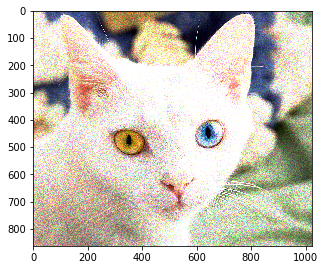

In [18]:
img_c = img.copy()
noise_img = img_c + img_c * noise
display(noise_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


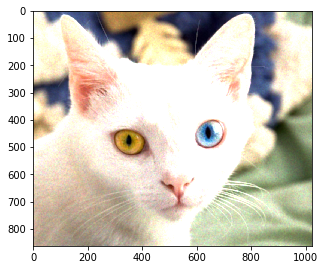

In [19]:
median = cv2.GaussianBlur(noise_img,(5,5),50)
display(median)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


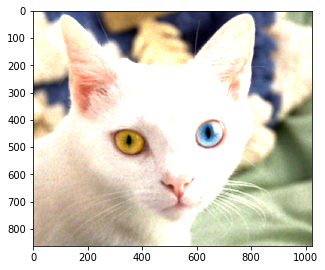

In [30]:
# Bilateral Filtering
# Only works find with float32
a = noise_img.astype('float32')
Bi_blur_img = cv2.bilateralFilter(a,9,75,75)
display(Bi_blur_img)

#### 透過上面的就可以很清楚看到,我們可以透過bluring將一些雜訊排除掉